In [5]:
import numpy as np
import pandas as pd
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import shutil
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Import additional required modules
from tensorflow.keras import layers, regularizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import ResNet50, VGG16, MobileNetV2, MobileNetV3Small, EfficientNetB0
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dropout, Dense, Input, Concatenate

In [5]:
# Your local folder path
folder_path = r"C:\Users\HP\PGA 38\Capstone Project 2\Dataset\dataset_blood_group"

# Loop through files in the folder
for dirname, _, filenames in os.walk(folder_path):
    for filename in filenames:
        print(os.path.join(dirname, filename))


C:\Users\HP\PGA 38\Capstone Project 2\Dataset\dataset_blood_group\A+\cluster_0_1001.BMP
C:\Users\HP\PGA 38\Capstone Project 2\Dataset\dataset_blood_group\A+\cluster_0_1005.BMP
C:\Users\HP\PGA 38\Capstone Project 2\Dataset\dataset_blood_group\A+\cluster_0_1009.BMP
C:\Users\HP\PGA 38\Capstone Project 2\Dataset\dataset_blood_group\A+\cluster_0_1026.BMP
C:\Users\HP\PGA 38\Capstone Project 2\Dataset\dataset_blood_group\A+\cluster_0_1029.BMP
C:\Users\HP\PGA 38\Capstone Project 2\Dataset\dataset_blood_group\A+\cluster_0_1036.BMP
C:\Users\HP\PGA 38\Capstone Project 2\Dataset\dataset_blood_group\A+\cluster_0_1041.BMP
C:\Users\HP\PGA 38\Capstone Project 2\Dataset\dataset_blood_group\A+\cluster_0_1045.BMP
C:\Users\HP\PGA 38\Capstone Project 2\Dataset\dataset_blood_group\A+\cluster_0_1063.BMP
C:\Users\HP\PGA 38\Capstone Project 2\Dataset\dataset_blood_group\A+\cluster_0_1075.BMP
C:\Users\HP\PGA 38\Capstone Project 2\Dataset\dataset_blood_group\A+\cluster_0_1082.BMP
C:\Users\HP\PGA 38\Capstone Proj

In [3]:
# STEP 1: Paths and Params
# --------------------------
# Local dataset folder (replace with your actual path)
original_dataset = r"C:\Users\HP\PGA 38\Capstone Project 2\Dataset\dataset_blood_group"

# A folder where you can save processed images or outputs
processed_dataset = r'C:\Users\HP\PGA 38\Capstone Project 2\Dataset\dataset_blood_group_processed'

# Image parameters
img_size = (224, 224)
target_per_class = 1800
batch_size = 32


In [4]:
# Target images per class
target_per_class = 1800
img_size = (224, 224)

# Reset processed dataset folder
if os.path.exists(processed_dataset):
    shutil.rmtree(processed_dataset)
os.makedirs(processed_dataset, exist_ok=True)

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
)

valid_exts = [".png", ".jpg", ".jpeg", ".bmp"]

# Loop over dataset
for class_name in os.listdir(original_dataset):
    class_dir = os.path.join(original_dataset, class_name)
    if not os.path.isdir(class_dir):
        continue

    save_dir = os.path.join(processed_dataset, class_name)
    os.makedirs(save_dir, exist_ok=True)

    images = [f for f in os.listdir(class_dir)
              if os.path.splitext(f)[1].lower() in valid_exts]

    count = 0


    for img_name in tqdm(images, desc=f"Processing {class_name}"):
        img_path = os.path.join(class_dir, img_name)
        img = load_img(img_path, color_mode="grayscale", target_size=img_size)
        x = img_to_array(img) / 255.0
        x = np.expand_dims(x, axis=0)

        # Save original image (convert to uint8 to avoid issues)
        tf.keras.preprocessing.image.save_img(
            os.path.join(save_dir, f"{class_name}_{count}.png"),
            x[0],
            scale=True
        )
        count += 1

        # Augment until target_per_class
        aug_iter = datagen.flow(x, batch_size=1,
                                save_to_dir=save_dir,
                                save_prefix=class_name,
                                save_format="png")
        while count < target_per_class:
            next(aug_iter)
            count += 1

    print(f"✅ Class '{class_name}' -> {len(os.listdir(save_dir))} images saved in {save_dir}")

# Final check: print structure
for root, dirs, files in os.walk(processed_dataset):
    print(root, "->", len(files), "files")

Processing A+: 100%|█████████████████████████████████████████████████████████████████| 565/565 [01:01<00:00,  9.17it/s]


✅ Class 'A+' -> 2210 images saved in C:\Users\HP\PGA 38\Capstone Project 2\Dataset\dataset_blood_group_processed\A+


Processing A-: 100%|███████████████████████████████████████████████████████████████| 1009/1009 [01:09<00:00, 14.58it/s]


✅ Class 'A-' -> 2652 images saved in C:\Users\HP\PGA 38\Capstone Project 2\Dataset\dataset_blood_group_processed\A-


Processing AB+: 100%|████████████████████████████████████████████████████████████████| 708/708 [00:54<00:00, 13.05it/s]


✅ Class 'AB+' -> 2354 images saved in C:\Users\HP\PGA 38\Capstone Project 2\Dataset\dataset_blood_group_processed\AB+


Processing AB-: 100%|████████████████████████████████████████████████████████████████| 761/761 [00:54<00:00, 14.01it/s]


✅ Class 'AB-' -> 2412 images saved in C:\Users\HP\PGA 38\Capstone Project 2\Dataset\dataset_blood_group_processed\AB-


Processing B+: 100%|█████████████████████████████████████████████████████████████████| 652/652 [00:54<00:00, 11.93it/s]


✅ Class 'B+' -> 2293 images saved in C:\Users\HP\PGA 38\Capstone Project 2\Dataset\dataset_blood_group_processed\B+


Processing B-: 100%|█████████████████████████████████████████████████████████████████| 741/741 [00:57<00:00, 12.86it/s]


✅ Class 'B-' -> 2395 images saved in C:\Users\HP\PGA 38\Capstone Project 2\Dataset\dataset_blood_group_processed\B-


Processing O+: 100%|█████████████████████████████████████████████████████████████████| 852/852 [00:59<00:00, 14.23it/s]


✅ Class 'O+' -> 2495 images saved in C:\Users\HP\PGA 38\Capstone Project 2\Dataset\dataset_blood_group_processed\O+


Processing O-: 100%|█████████████████████████████████████████████████████████████████| 712/712 [00:49<00:00, 14.31it/s]

✅ Class 'O-' -> 2366 images saved in C:\Users\HP\PGA 38\Capstone Project 2\Dataset\dataset_blood_group_processed\O-
C:\Users\HP\PGA 38\Capstone Project 2\Dataset\dataset_blood_group_processed -> 0 files
C:\Users\HP\PGA 38\Capstone Project 2\Dataset\dataset_blood_group_processed\A+ -> 2210 files
C:\Users\HP\PGA 38\Capstone Project 2\Dataset\dataset_blood_group_processed\A- -> 2652 files
C:\Users\HP\PGA 38\Capstone Project 2\Dataset\dataset_blood_group_processed\AB+ -> 2354 files
C:\Users\HP\PGA 38\Capstone Project 2\Dataset\dataset_blood_group_processed\AB- -> 2412 files
C:\Users\HP\PGA 38\Capstone Project 2\Dataset\dataset_blood_group_processed\B+ -> 2293 files
C:\Users\HP\PGA 38\Capstone Project 2\Dataset\dataset_blood_group_processed\B- -> 2395 files
C:\Users\HP\PGA 38\Capstone Project 2\Dataset\dataset_blood_group_processed\O+ -> 2495 files
C:\Users\HP\PGA 38\Capstone Project 2\Dataset\dataset_blood_group_processed\O- -> 2366 files


In [6]:
# --------------------------
# STEP 3: Train/Val/Test Split
# --------------------------
valid_exts = [".jpg", ".jpeg", ".png", ".bmp", ".tiff"]

processed_dataset = r'C:\Users\HP\PGA 38\Capstone Project 2\Dataset\dataset_blood_group_processed'
train_dir = os.path.join(processed_dataset, "train")
val_dir = os.path.join(processed_dataset, "val")
test_dir = os.path.join(processed_dataset, "test")

# Create main folders
for d in [train_dir, val_dir, test_dir]:
    os.makedirs(d, exist_ok=True)

# Only consider class folders that are actual directories
class_folders = [d for d in os.listdir(processed_dataset)
                 if os.path.isdir(os.path.join(processed_dataset, d))
                 and d not in ["train", "val", "test"]]

for class_name in class_folders:
    class_path = os.path.join(processed_dataset, class_name)
    
    # Only consider image files in this folder
    imgs = [f for f in os.listdir(class_path)
            if os.path.isfile(os.path.join(class_path, f)) and os.path.splitext(f)[1].lower() in valid_exts]

    if len(imgs) == 0:
        print(f"⚠️ Class '{class_name}' has 0 valid images, skipping.")
        continue
    if len(imgs) < 1800:
        print(f"⚠️ Class '{class_name}' has less than 1800 images ({len(imgs)}), skipping.")
        continue

    # Split
    train_imgs, temp_imgs = train_test_split(imgs, train_size=1260, random_state=42)
    val_imgs, test_imgs = train_test_split(temp_imgs, train_size=270, test_size=270, random_state=42)

    # Copy images to corresponding folders
    for subset, subset_imgs in zip([train_dir, val_dir, test_dir], [train_imgs, val_imgs, test_imgs]):
        subset_class_dir = os.path.join(subset, class_name)
        os.makedirs(subset_class_dir, exist_ok=True)
        for img_name in subset_imgs:
            src = os.path.join(class_path, img_name)
            dst = os.path.join(subset_class_dir, img_name)
            shutil.copy(src, dst)

    # Print counts
    print(f"Class '{class_name}': Train={len(train_imgs)}, Val={len(val_imgs)}, Test={len(test_imgs)}")

print("Dataset split completed")

Class 'A+': Train=1260, Val=270, Test=270
Class 'A-': Train=1260, Val=270, Test=270
Class 'AB+': Train=1260, Val=270, Test=270
Class 'AB-': Train=1260, Val=270, Test=270
Class 'B+': Train=1260, Val=270, Test=270
Class 'B-': Train=1260, Val=270, Test=270
Class 'O+': Train=1260, Val=270, Test=270
Class 'O-': Train=1260, Val=270, Test=270
Dataset split completed


In [7]:
train_dir = os.path.join(processed_dataset, "train")
val_dir = os.path.join(processed_dataset, "val")
test_dir = os.path.join(processed_dataset, "test")

In [8]:
# total count
def count_images(folder):
    total = 0
    for root, dirs, files in os.walk(folder):
        total += len([f for f in files if f.endswith((".jpg", ".png", ".jpeg",".bmp"))])
    return total

train_count = count_images(train_dir)
val_count = count_images(val_dir)
test_count = count_images(test_dir)

print(f"Train images: {train_count}")
print(f"Validation images: {val_count}")
print(f"Test images: {test_count}")
print(f"Total images: {train_count + val_count + test_count}")

Train images: 10080
Validation images: 2160
Test images: 2160
Total images: 14400


In [9]:
# --------------------------
# STEP 4: Data Generators
# --------------------------
img_size = (224, 224)
batch_size = 32
train_gen = ImageDataGenerator(rescale=1./255).flow_from_directory(
    train_dir, target_size=img_size, batch_size=batch_size,
    class_mode="categorical", color_mode="grayscale"
)
val_gen = ImageDataGenerator(rescale=1./255).flow_from_directory(
    val_dir, target_size=img_size, batch_size=batch_size,
    class_mode="categorical", color_mode="grayscale"
)
test_gen = ImageDataGenerator(rescale=1./255).flow_from_directory(
    test_dir, target_size=img_size, batch_size=batch_size,
    class_mode="categorical", color_mode="grayscale", shuffle=False
)

num_classes = len(train_gen.class_indices)

Found 10080 images belonging to 8 classes.
Found 2160 images belonging to 8 classes.
Found 2160 images belonging to 8 classes.


In [10]:

# STEP 5: Model Input Preparation
# Fix grayscale input → repeat channels
input_shape = (224, 224, 1)
inputs = Input(shape=input_shape)
x = Concatenate()([inputs, inputs, inputs])  # make 3 channels

In [11]:
# STEP 6: Build Models

# MobileNetV2 
print("Building MobileNetV2 model...")
base_model_mobilenetv2 = MobileNetV2(weights="imagenet", include_top=False, input_tensor=x)
for layer in base_model_mobilenetv2.layers[:-30]:
    layer.trainable = False
x_mobilenetv2  = base_model_mobilenetv2.output
x_mobilenetv2  = GlobalAveragePooling2D()(x_mobilenetv2)
x_mobilenetv2  = Dropout(0.5)(x_mobilenetv2)
x_mobilenetv2  = Dense(128, activation="relu")(x_mobilenetv2)
output_mobilenetv2  = Dense(num_classes, activation="softmax")(x_mobilenetv2)
mobilenetv2_model  = Model(inputs=base_model_mobilenetv2.input, outputs=output_mobilenetv2)
mobilenetv2_model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)


Building MobileNetV2 model...


C:\Users\HP\AppData\Local\Temp\ipykernel_14700\4267679603.py:5: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model_mobilenetv2 = MobileNetV2(weights="imagenet", include_top=False, input_tensor=x)


In [12]:
## print("Training MobileNetV2...")
history = mobilenetv2_model.fit(
    train_gen, 
    validation_data=val_gen, 
    epochs=30
)

C:\Users\HP\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
315/315 ━━━━━━━━━━━━━━━━━━━━ 647s 2s/step - accuracy: 0.8954 - loss: 0.2987 - val_accuracy: 0.7704 - val_loss: 1.4682
Epoch 2/30
315/315 ━━━━━━━━━━━━━━━━━━━━ 530s 2s/step - accuracy: 0.9368 - loss: 0.1783 - val_accuracy: 0.8907 - val_loss: 0.4976
Epoch 3/30
315/315 ━━━━━━━━━━━━━━━━━━━━ 468s 1s/step - accuracy: 0.9502 - loss: 0.1402 - val_accuracy: 0.9181 - val_loss: 0.2794
Epoch 4/30
315/315 ━━━━━━━━━━━━━━━━━━━━ 489s 1s/step - accuracy: 0.9567 - loss: 0.1179 - val_accuracy: 0.9269 - val_loss: 0.3904
Epoch 5/30
315/315 ━━━━━━━━━━━━━━━━━━━━ 705s 2s/step - accuracy: 0.9663 - loss: 0.0989 - val_accuracy: 0.9134 - val_loss: 0.3564
Epoch 6/30
315/315 ━━━━━━━━━━━━━━━━━━━━ 683s 2s/step - accuracy: 0.9676 - loss: 0.0905 - val_accuracy: 0.9264 - val_loss: 0.2553
Epoch 7/30
315/315 ━━━━━━━━━━━━━━━━━━━━ 540s 2s/step - accuracy: 0.9721 - loss: 0.0750 - val_accuracy: 0.9366 - val_loss: 0.2147
Epoch 8/30
315/315 ━━━━━━━━━━━━━━━━━━━━ 472s 1s/step - accuracy: 0.9750 - loss: 0.0683 - val_accu

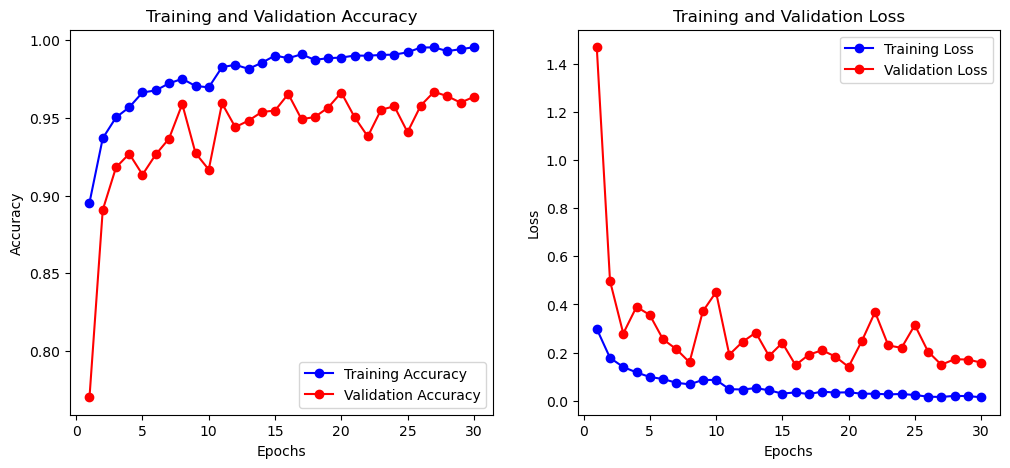

In [13]:
import matplotlib.pyplot as plt

# Assuming 'history' is the object returned by model.fit
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

# Plot Accuracy
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(epochs, acc, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'ro-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1,2,2)
plt.plot(epochs, loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [14]:
test_loss, test_acc = mobilenetv2_model.evaluate(test_gen)
print('Test accuracy:', test_acc)

68/68 ━━━━━━━━━━━━━━━━━━━━ 74s 1s/step - accuracy: 0.9509 - loss: 0.2261     
Test accuracy: 0.9509259462356567


In [ ]:
train_acc = history.history['accuracy'][-1]
val_acc = history.history['val_accuracy'][-1]

print(f"Final Training Accuracy:   {train_acc:.4f}")
print(f"Final Validation Accuracy: {val_acc:.4f}")
print(f"Test Accuracy:             {test_acc:.4f}")

Final Training Accuracy:   0.9953
Final Validation Accuracy: 0.9634
Test Accuracy:             0.9509


Test Accuracy:             0.9509
68/68 ━━━━━━━━━━━━━━━━━━━━ 83s 1s/step 

Classification Report:
              precision    recall  f1-score   support

          A+       0.92      0.98      0.95       270
          A-       0.94      0.91      0.93       270
         AB+       0.98      0.96      0.97       270
         AB-       0.94      0.96      0.95       270
          B+       0.97      0.97      0.97       270
          B-       0.96      0.97      0.97       270
          O+       0.91      0.94      0.93       270
          O-       0.99      0.90      0.94       270

    accuracy                           0.95      2160
   macro avg       0.95      0.95      0.95      2160
weighted avg       0.95      0.95      0.95      2160



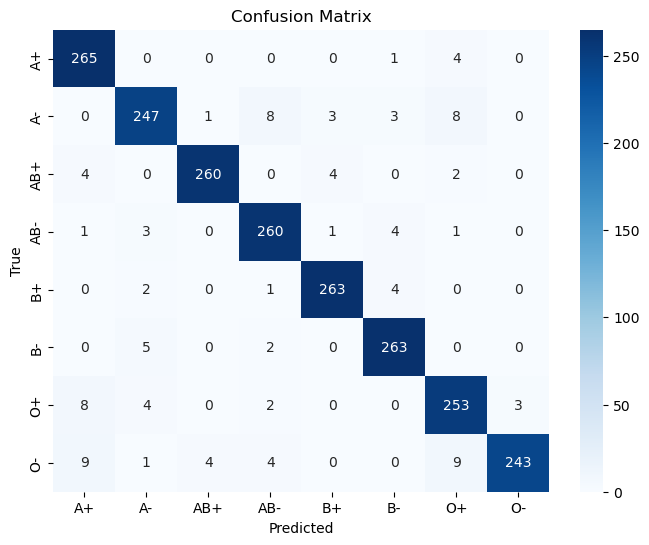

In [ ]:
# --- Evaluate on Test Data ---
test_loss, test_acc = mobilenetv2_model.evaluate(test_gen, verbose=0)
print(f"Test Accuracy:             {test_acc:.4f}")

# --- Detailed Evaluation on Test Data ---
preds = mobilenetv2_model.predict(test_gen)
pred_classes = np.argmax(preds, axis=1)
true_labels = test_gen.classes

# Classification Report
print("\nClassification Report:")
print(classification_report(
    true_labels,
    pred_classes,
    target_names=list(test_gen.class_indices.keys())
))

# Confusion Matrix
cm = confusion_matrix(true_labels, pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=list(test_gen.class_indices.keys()),
            yticklabels=list(test_gen.class_indices.keys()))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
True Label: O+
Predicted Label: O+
Confidence: 100.00%
All Probabilities: [[2.2146506e-13 6.1857842e-16 1.1197429e-21 1.8310726e-12 1.2130149e-20
  1.6217956e-19 1.0000000e+00 3.2051766e-17]]


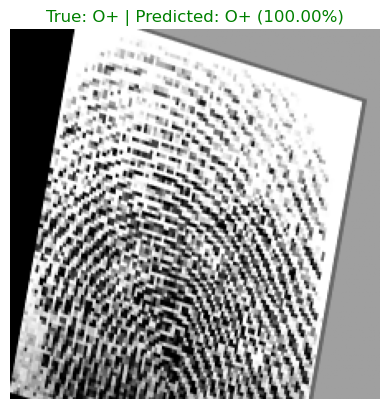

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import os

# Path to your image
img_path = r"C:\Users\HP\PGA 38\Capstone Project 2\Dataset\dataset_blood_group_processed\test\O+\O+_0_1568.png"

# 1️⃣ Extract true label from folder name
true_label = os.path.basename(os.path.dirname(img_path))

# 2️⃣ Load image as grayscale and resize
img = image.load_img(img_path, target_size=(224, 224), color_mode='grayscale')

# 3️⃣ Convert to array and normalize
img_array = image.img_to_array(img) / 255.0

# 4️⃣ Expand dims to make batch size 1
img_array = np.expand_dims(img_array, axis=0)  # shape: (1, 224, 224, 1)

# 5️⃣ Predict
pred_prob = mobilenetv2_model.predict(img_array)
pred_class = np.argmax(pred_prob, axis=1)[0]

# 6️⃣ Map class index to class name
class_names = list(train_gen.class_indices.keys())
pred_label = class_names[pred_class]

# 7️⃣ Get confidence
confidence = pred_prob[0][pred_class]  # probability of predicted class

# 8️⃣ Print results
print(f"True Label: {true_label}")
print(f"Predicted Label: {pred_label}")
print(f"Confidence: {confidence*100:.2f}%")
print(f"All Probabilities: {pred_prob}")

# 9️⃣ Show image with true + predicted labels + confidence
color = 'green' if pred_label == true_label else 'red'
plt.imshow(img_array[0, :, :, 0], cmap='gray')
plt.title(f"True: {true_label} | Predicted: {pred_label} ({confidence*100:.2f}%)", color=color)
plt.axis('off')
plt.show()


In [23]:
tf.keras.models.save_model(mobilenetv2_model, 'mobilenetv2_model_2.hdf5')
print("Model saved as 'mobilenetv2_model_2.hdf5'")

Model saved as 'mobilenetv2_model_2.hdf5'


In [ ]:
# EfficientNetB0
# print("Building EfficientNetB0 model...")
# base_model_efficientnet = EfficientNetB0(weights="imagenet", include_top=False, input_tensor=x)

# # Freeze all layers except last 30
# for layer in base_model_efficientnet.layers[:-30]:
#     layer.trainable = False

# x_efficientnet = base_model_efficientnet.output
# x_efficientnet = GlobalAveragePooling2D()(x_efficientnet)
# x_efficientnet = Dropout(0.5)(x_efficientnet)
# x_efficientnet = Dense(128, activation="relu")(x_efficientnet)
# output_efficientnet = Dense(num_classes, activation="softmax")(x_efficientnet)

# efficientnet_model = Model(inputs=base_model_efficientnet.input, outputs=output_efficientnet)

# efficientnet_model.compile(
#     optimizer="adam",
#     loss="categorical_crossentropy",
#     metrics=["accuracy"]
# )


In [ ]:
# input_shape = (224, 224, 1)   # your images are grayscale
# inputs = Input(shape=input_shape)

# # Convert grayscale → 3 channels (RGB)
# x = Concatenate()([inputs, inputs, inputs])

In [ ]:
# print("Building EfficientNetB0 model...")
# base_model_efficientnet = EfficientNetB0(weights="imagenet", include_top=False, input_tensor=x)

# # Freeze layers except last 30
# for layer in base_model_efficientnet.layers[:-30]:
#     layer.trainable = False

# x_efficientnet = base_model_efficientnet.output
# x_efficientnet = GlobalAveragePooling2D()(x_efficientnet)
# x_efficientnet = Dropout(0.5)(x_efficientnet)
# x_efficientnet = Dense(128, activation="relu")(x_efficientnet)
# output_efficientnet = Dense(num_classes, activation="softmax")(x_efficientnet)

# efficientnet_model = Model(inputs=inputs, outputs=output_efficientnet)

# efficientnet_model.compile(
#     optimizer="adam",
#     loss="categorical_crossentropy",
#     metrics=["accuracy"]
# )